In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# 读取网络
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\network\p2p-Gnutella05.txt"
def read_txt_direct(data):
    g = nx.read_edgelist(data,  nodetype=int, create_using=nx.DiGraph())
    return g
g = read_txt_direct(path)

In [84]:
# 生成数据
import os
import networkx as nx
from utils import save_obj
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

class GenerateSIRData():
    def __init__(self, graph_params, model_params, seed = 0):
        # initialize
        self.graph_type = graph_params['type']
        self.graph_params = graph_params
        self.beta  = model_params['beta']
        self.gamma = model_params['gamma']
        self.fraction_infected = model_params['fraction_infected']
        self.seed = seed
        self.n_nodes = graph_params['n_nodes']
        self.d = graph_params['d']
        self.wk = graph_params['wk']
        self.wp = graph_params['wp']
        self.p = graph_params['p']
        self.m = graph_params['m']
        self.graph = graph_params['graph']
        
    def generate_graph(self):
        if self.graph_type == 'er':
            # p随机图
            print('er')
            self.g = nx.erdos_renyi_graph(self.n_nodes, self.p)
            # self.g = load_obj(g_path)
        elif self.graph_type == 'ws':
            # 小世界随机图
            # g_path = self.graph_params['g_path']
            # self.g = load_obj(g_path)
            self.g = nx.watts_strogatz_graph(self.n_nodes, self.wk, self.wp, 0)
        elif self.graph_type == 'regular':
            print(self.n_nodes)
            print(self.d)
            self.g = nx.random_regular_graph(self.d, self.n_nodes)
        elif self.graph_type == 'added':
            self.g = self.graph
            print('number of nodes: {}'.format(len(self.g.nodes)))
        elif self.graph_type == 'scalefree':
            print('scaf')
            self.g = nx.barabasi_albert_graph(self.n_nodes, self.m)

    def generate_model(self):
        self.model = ep.SIRModel(self.g, seed=self.seed)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', self.beta)
        cfg.add_model_parameter('gamma', self.gamma)
        cfg.add_model_parameter("fraction_infected", self.fraction_infected)
        
        self.model.set_initial_status(cfg)
    
    def print_info(self):
        print('info: ', self.model.get_info())

        
    def generate_data(self, bunch_size):
        self.generate_graph()
        self.generate_model()
        self.print_info()
        # Simulation execution
        self.iterations = self.model.iteration_bunch(bunch_size)
        # 方便做可视化的
        self.trends = self.model.build_trends(self.iterations)
    
    def save_data(self, save_dir = './data'):
        # 保存图
        # 保存数据
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_name = self.graph_type +'d_{}beta{}_gamma{}_fraction{}'.format(
                                            self.d, self.beta, self.gamma, self.fraction_infected
                                             )
        save_obj(self.trends, os.path.join(save_dir, 'trends_'+save_name))
        save_obj(self.iterations, os.path.join(save_dir, 'iterations_'+save_name))
# graph_params = {'type':'added','p': 0.00, 'wk': 5, 'wp': 0.001, 'd':50, 'n_nodes': 8846, 'graph':g, 'm':6}
# # model_params = {'beta': 0.04, 'gamma': 0.001, 'fraction_infected': 0.05}
# model_params = {'beta': 0.007, 'gamma': 0.002, 'fraction_infected': 0.002}
# sir_model = GenerateSIRData(graph_params, model_params, 0)
# sir_model.generate_data(3000)
# save_dir = './paper_data/case1/obe'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# sir_model.save_data(save_dir)

In [ ]:
a=sir_model.trends
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots() 
plt.rcParams.update({'font.size':20})
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 26)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-3, 3))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
# ax1.plot(a[0]['trends']['node_count'][0], label=0)
ax1.plot(np.array(a[0]['trends']['node_count'][1])/8846, label=1)
ax1.plot(np.array(a[0]['trends']['node_count'][2])/8846, label=2)
ax1.legend()
plt.gcf().subplots_adjust(left=0.05,top=0.91,bottom=0.09)
plt.tight_layout()
plt.savefig('./paper_data/case1/obe/node_count.png')
plt.show()
plt.close()

C:\Users\xinji\AppData\Local\Temp\ipykernel_16860\475147629.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


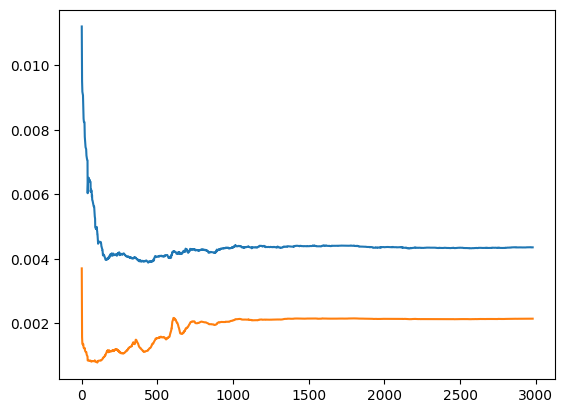

In [18]:
import matplotlib.pyplot as plt
data = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N100_L10.npy")
from utils import reverse_map
plt.plot([reverse_map(i) for i in data[20:,2]])
plt.plot([reverse_map(i) for i in data[20:,3]])
# plt.savefig(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\paper_data\case1\obe\para_count.png")
plt.show()

In [27]:
import matplotlib
matplotlib.use('TkAgg')  # 或者使用 'Qt5Agg'
import matplotlib.pyplot as plt

In [24]:
plt.plot([i for i in data[:,0]])
plt.plot([i for i in data[:,1]])
plt.plot([i for i in np.array(sir_model.trends[0]['trends']['node_count'][1])/8846])
plt.plot([i for i in np.array(sir_model.trends[0]['trends']['node_count'][2])/8846])
plt.savefig(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\paper_data\case1\obe\node_count.png")
plt.show()

C:\Users\xinji\AppData\Local\Temp\ipykernel_12956\3338689352.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [ ]:
import pickle
sir_model = pickle.load(open(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\paper_data\case1\obe\trends_addedd_50beta0.005_gamma0.002_fraction0.002.pkl', 'rb'))

In [19]:
print(trends)

[{'trends': {'node_count': {0: [8829, 8829, 8828, 8828, 8828, 8827, 8823, 8823, 8823, 8823, 8822, 8821, 8821, 8821, 8820, 8820, 8820, 8820, 8820, 8820, 8820, 8820, 8819, 8819, 8819, 8819, 8819, 8818, 8818, 8818, 8818, 8817, 8816, 8816, 8815, 8815, 8814, 8813, 8813, 8813, 8812, 8812, 8811, 8811, 8810, 8809, 8809, 8807, 8807, 8806, 8806, 8805, 8805, 8804, 8803, 8803, 8803, 8803, 8802, 8798, 8798, 8797, 8795, 8795, 8795, 8794, 8793, 8793, 8793, 8792, 8790, 8790, 8789, 8789, 8788, 8786, 8786, 8784, 8783, 8782, 8782, 8781, 8781, 8781, 8780, 8779, 8779, 8778, 8777, 8776, 8773, 8771, 8771, 8770, 8768, 8767, 8765, 8763, 8761, 8760, 8760, 8758, 8757, 8757, 8757, 8757, 8757, 8755, 8752, 8749, 8748, 8747, 8746, 8745, 8744, 8740, 8740, 8738, 8736, 8736, 8736, 8734, 8733, 8732, 8732, 8731, 8729, 8728, 8728, 8727, 8725, 8722, 8720, 8719, 8717, 8716, 8715, 8712, 8711, 8711, 8709, 8706, 8705, 8704, 8701, 8700, 8699, 8697, 8693, 8692, 8689, 8688, 8687, 8686, 8684, 8682, 8681, 8679, 8679, 8677, 8674, 86

In [10]:
from imp import reload
import sir_enkf
reload(sir_enkf)
import EnKF_delta_both
reload(EnKF_delta_both)
from sir_enkf import run 
m = 6
graph_params = {'type':'scenario1','p': 0.005, 'wk': 5, 'wp': 0.001, 'd':50, 'n_nodes': 8846, 'm':m}
gt_param = {'graph': g, 'beta_gt':0.005, 'gamma_gt':0.002, 'Is':0.002, 'gts': sir_model.trends, 'n_nodes':8846, 'save_dir':'./paper_data/case1/result'}
# run(gt_param, beta = 0.01, gamma = 0.01, task= 'all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both')

In [7]:
sir_model[0]['trends']['node_count'][0][0]

8829

In [13]:
import sir_enkf
reload(sir_enkf)
for N in [100]:
    run(gt_param, beta = 0.01, gamma = 0.01, task= 'all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = N, windows = 10, rounds = 3000, measurement_mode='both')
# for L in [1, 5, 10, 20]:
#     run(gt_param, beta = 0.01, gamma = 0.01, task= 'all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = L, rounds = 3000, measurement_mode='both')
# for Q_param in [1e-5, 1e-4, 1e-3, 1e-2]:
#     run(gt_param, beta = 0.01, gamma = 0.01, task= 'all', Q_x = 1e-4, Q_param = Q_param, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both')
# for P_param in [1e-5, 1e-4, 1e-3, 1e-2]:
#     run(gt_param, beta = 0.01, gamma = 0.01, task= 'all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = P_param, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both')    
                
            

save to:--->  ./res_1209-10/all/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N100_L10


Test: 100%|██████████| 3000/3000 [50:51<00:00,  1.02s/it, param=(0.004358101096609446, 0.0021455254223533005)]  


In [12]:
import pickle
from utils import reverse_map
trends = pickle.load(open(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\paper_data\case1\obe\trends_addedd_50beta0.005_gamma0.002_fraction0.002.pkl', 'rb'))
beta_t = 0.005
gamma_t = 0.002
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N150_L10.npy"
res = np.load(path)
def cal_acc(beta_t, gamma_t, trends, res):
    ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[-50:,2]]).mean()
    ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[-50:,3]]).mean()
    ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[15:]/8846)]).mean()
    ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[15:]/8846)]).mean()
    return ave_beta, ave_gamma, ave_i, ave_r
a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
print((a,b,c,d))
print("{:.4e}".format(a+b))
print("{:.4e}".format(c+d))

(0.17902376854429508, 0.0002801628585189289, 2.327423362230435e-05, 0.44966532326530345)
1.7930e-01
4.4969e-01


In [13]:
import numpy as np
data = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N150_L10.npy")

In [502]:
# SIR模型的模拟函数
# 预测函数
from tqdm import tqdm
import math
def map(x):
    return math.tan((x-1/2)*math.pi) / 300

def reverse_map(y):
    return math.atan(300*y) / math.pi + 1/2

def sir(I, R, beta, gamma, dt=1):
    dI = beta * (1-I-R) * I  - gamma * I
    dR = gamma * I
    return I + dI*dt, R + dR*dt

# 观测矩阵，这里假设观测数据是I和R的线性组合
H = np.diag([1,1,0,0])

# 还是我自己写吧
# 状体 I, R, beta, gamma
trends = sir_model.trends
def ensemble_kalman_filter(observations, Q_beta, Q_gamma, R_cov, fraction, ensemble_size=50, steps=3000):
    beta_ensemble = [map(i) if i>=0 else map(0.01) for i in np.random.normal(0.01, Q_beta, ensemble_size)]
    gamma_ensemble = [map(i) if i>=0 else map(0.01) for i in np.random.normal(0.01, Q_gamma, ensemble_size)]
    # beta_ensemble = [map(0.01) for i in range(ensemble_size)]
    # gamma_ensemble = [map(0.01) for i in range(ensemble_size)]
    # 初始化状态集合
    I_ensemble = np.full(ensemble_size, fraction)
    R_ensemble = np.full(ensemble_size, 0.)
    
    x_ensemble = np.vstack((I_ensemble, R_ensemble, beta_ensemble, gamma_ensemble))
    print(x_ensemble.shape)
    estimates = []
    process = []
    
    for t in tqdm(range(steps)):
        # if t%500 == 0:
        #     R_cov/=5
        R_matrix = np.diag([R_cov, R_cov])
        # 模拟SIR模型 预测步
        process.append(x_ensemble)
        for j in range(ensemble_size):
            x_ensemble[0,j], x_ensemble[1,j] = sir(x_ensemble[0,j], x_ensemble[1,j], reverse_map(x_ensemble[2,j]), reverse_map(x_ensemble[3,j]))
        #计算状态均值
        
        y = x_ensemble[0:2,:]
        # 计算集合协方差
        P = np.cov(y) + R_matrix
        # print(x_ensemble.mean(axis=0).shape)
        # 计算集合观测状态协方差
        Pxy = (x_ensemble-x_ensemble.mean(axis=1).reshape(-1,1))@(y - y.mean(axis=1).reshape(-1,1)).T/(ensemble_size-1)
        # 计算卡尔曼增益
        K = Pxy@np.linalg.inv(P)
        # 生成随机数
        eta = np.random.multivariate_normal(np.zeros(2), np.diag([Q_beta, Q_gamma]), ensemble_size).T
        # 更新参数
        i=1
        # print((observations[[t],:].T - y[:,i] + eta[:,i]).shape)
        # print(y[:,i].shape)
        # print(eta[:,i].shape)
        # print(observations[t,:].T.shape)
        # print(K.shape
        for i in range(ensemble_size):
            x_ensemble[:,i] +=  K@(observations[t,:].T - y[:,i] + eta[:,i])
        estimates.append(x_ensemble.mean(axis=1))
    return np.array(estimates), np.array(process)
        
        
        
# 生成观测
observations = np.vstack((trends[0]["trends"]['node_count'][1], trends[0]["trends"]['node_count'][2])).T/8846
        
estimated, p = ensemble_kalman_filter(observations, Q_beta = 0.02, Q_gamma= 0.008, R_cov = 0.01, fraction = 0.002, ensemble_size=50, steps=3000)        
        
    


(4, 50)


100%|██████████| 3000/3000 [00:01<00:00, 1699.93it/s]


In [507]:
np.save(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.007g0.002e.npy", estimated)

In [273]:
a = np.random.randn(2,1)
b = np.random.randn(2,4)
print(a)
print(b)
print(a-b)


[[-1.14090657]
 [-0.87825638]]
[[ 1.03163427  1.01942164 -1.71711842 -0.3263439 ]
 [-1.56603841 -0.01512973  0.0632185  -1.24843178]]
[[-2.17254085 -2.16032821  0.57621185 -0.81456267]
 [ 0.68778204 -0.86312665 -0.94147488  0.3701754 ]]


In [264]:
p[:,0,0]

array([0.00199996, 0.00320508, 0.00253446, ...,        nan,        nan,
              nan])

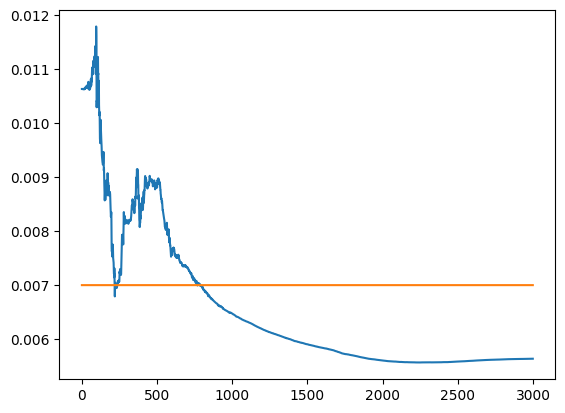

In [506]:
plt.plot([reverse_map(i) for i in estimated[:,2]])
plt.plot([0.007 for i in estimated[:,3]])
# 

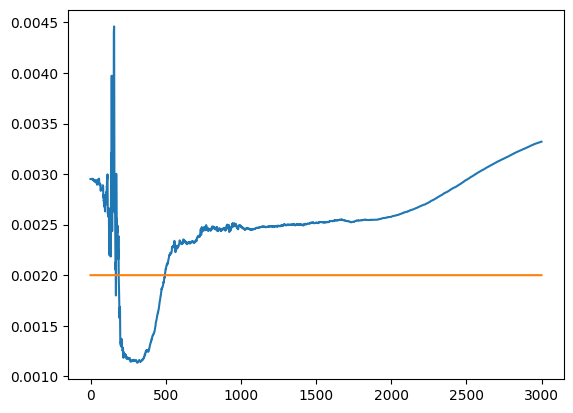

In [504]:
plt.plot([reverse_map(i) for i in estimated[:,3]])
plt.plot([0.002 for i in estimated[:,3]])

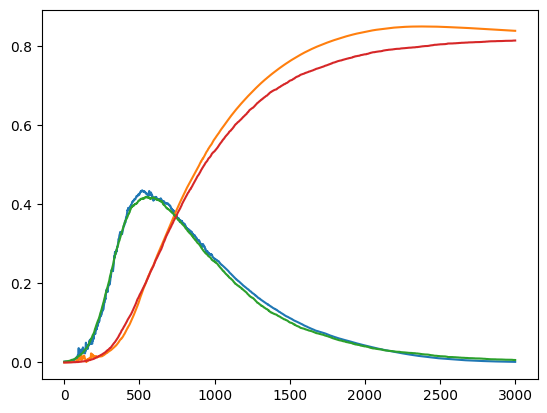

In [503]:
plt.plot([i for i in estimated[:,0]])
plt.plot([i for i in estimated[:,1]])
plt.plot(observations[:,0], label='Observed I')
plt.plot(observations[:,1], label='Observed R')

In [72]:
Q_beta = 1e-4
ensemble_size = 50
beta_ensemble = np.random.normal(0.01, Q_beta, ensemble_size)

In [25]:
S0, I0, R0 = 8746, 100, 0  # 初始状态
beta_true = 0.005        # 真实的感染率
gamma_true = 0.002        # 真实的恢复率
dt = 1                  # 时间步长
steps = 3000             # 模拟步数
Q_beta = 0.01           # 感染率的过程噪声
Q_gamma = 0.01          # 恢复率的过程噪声
R_cov = 0.001              # 观测噪声
observations = trends[0]["trends"]["node_count"][1]
beta_estimates, gamma_estimates = ensemble_kalman_filter(S0, I0, R0, beta_true, gamma_true, dt, observations, Q_beta, Q_gamma, R_cov)


(2, 2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [22]:
from imp import reload
import sir_enkf
reload(sir_enkf)
import EnKF_delta_both
reload(EnKF_delta_both)
from sir_enkf import run 
run(gt_param, beta = 0.01, gamma = 0.01, task= 'both', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both')

save to:--->  ./res_1209-10/both/beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10


Test: 100%|██████████| 3000/3000 [24:09<00:00,  2.07it/s, param=(0.004040717995612342, 0.0020269572298194927)] 


In [36]:
a = np.random.exponential(0.01, 10000)
def exp_cdf(lam, x):
    return 1 - np.exp(- x/lam)

def revers_cdf(lam, x):
    return -np.log(1 - x) *lam

def reverse_new(a, new_lam, lam):
    return revers_cdf(new_lam, exp_cdf(lam, a))
    


In [154]:
Counter(model.status.values())

Counter({0: 2990, 1: 10})

In [169]:
from collections import Counter
import math
from tqdm import tqdm
from joblib import Parallel, delayed

def map(x):
    return math.tan((x-1/2)*math.pi) / 300

def reverse_map(y):
    return math.atan(300*y) / math.pi + 1/2


def generate_particle_group(particle_size, fraction_infected, g):
    # 一个用来保存模型，一个用来保存状态
    particle_group = []
    state_group = []
    beta = np.random.uniform(0, 0.015, particle_size)
    gamma = np.random.uniform(0, 0.02, particle_size)
    print(min(beta))
    print(min(gamma))
    for i in range(particle_size):
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', beta[i])
        cfg.add_model_parameter('gamma',gamma[i])
        cfg.add_model_parameter("fraction_infected", fraction_infected) # 用模拟值做初始感染率
        model = ep.SIRModel(g)
        model.set_initial_status(cfg)
        particle_group.append(model)
        count = Counter(model.status.values())
        # print(count[1]/8846)
        state_group.append((model.status, count[1]/8846, count[2]/8846, map(beta[i]), map(gamma[i])))
        
    return particle_group, np.array(state_group)


def update_particle_group(particle_group, state_group):
    for i in range(len(particle_group)):
        state = state_group[i]
        particle_group[i].status = state[0]
        particle_group[i].params['model']['beta'] = reverse_map(state[-2])
        particle_group[i].params['model']['gamma'] = reverse_map(state[-1])
    return particle_group, state_group

# 预测步向前走一步，更新状态
def predict(model):
    iterations = model.iteration_bunch(bunch_size=1)
    trends = model.build_trends(iterations)
    return model, model.status, trends


    

def cal_prob(obe, R, state):
    # 二维高斯分布, obe是均值
    return np.exp(-0.5 * ( ((obe[0] - state[0]) ** 2 + (obe[1] - state[1])**2 )/ R) )


def resample(state_group, weights):
    index = np.random.choice(list(np.arange(len(state_group))), size=len(state_group), replace=True, p=weights)
    return state_group[index,:]

def single_particle(particle, state, observe, R_cov, Q_beta, Q_gamma):
    _, new_state, trends = predict(particle)
    beta = state[-2]
    gamma = state[-1]
    # 对参数做扰动
    ave_i = trends[-1]['trends']['node_count'][1][-1]/8846
    ave_r = trends[-1]['trends']['node_count'][2][-1]/8846
    new_beta = np.random.normal(beta, Q_beta, 1)
    new_gamma = np.random.normal(gamma, Q_gamma, 1)
    weight = cal_prob(observe, R_cov, (ave_i, ave_r))
    return (new_state, ave_i, ave_r, new_beta, new_gamma), weight
    

def particle_filter(observations, Q_beta, Q_gamma, R_cov, particle_size, fraction_infected, g):
    # 初始化粒子
    estimated = []
    particle_group, state_group = generate_particle_group(particle_size, fraction_infected, g)
    # 初始化权重
    weights = np.ones(particle_size) / particle_size
    with tqdm(range(len(observations)//3), desc='Test') as tbar:
    # with tqdm(range(10), desc='Test') as tbar:
        for t in tbar:
        # 预测步骤
            estimated_i = []
            estimated_r = []
            estimated_beta = []
            esitmated_gamma = []
            for i in range(particle_size):
                # new_state是当前状态, trends是做的统计
                _, new_state, trends = predict(particle_group[i])
                beta = state_group[i][-2]
                gamma = state_group[i][-1]
                # 对参数做扰动
                ave_i = trends[-1]['trends']['node_count'][1][-1]/8846
                ave_r = trends[-1]['trends']['node_count'][2][-1]/8846
                # print( trends[-1]['trends']['node_count'][1])
                new_beta = np.random.normal(beta, Q_beta, 1)
                new_gamma = np.random.normal(gamma, Q_gamma, 1)
                state_group[i] = (new_state, ave_i, ave_r, new_beta, new_gamma)
                # 不做扰动
                # state_group[i] = (new_state, ave_i, ave_r, beta, gamma)
                actual_state = np.array([ave_i, ave_r])
                # 权重更新
                weights[i] = cal_prob(observations[t], R_cov, actual_state)
            weights/= sum(weights)
            # 重采样
            state_group = resample(state_group, weights)
            # 更新模型
            particle_group, state_group = update_particle_group(particle_group, state_group)
            for i in range(particle_size):
                estimated_i.append(state_group[i][1])
                estimated_r.append(state_group[i][2])
                estimated_beta.append(reverse_map(state_group[i][-2]))
                esitmated_gamma.append(reverse_map(state_group[i][-1]))
                
            tbar.set_postfix(param =  (np.mean(estimated_i), np.mean(estimated_r), np.mean(estimated_beta), np.mean(esitmated_gamma)))
            estimated.append((np.mean(estimated_i), np.mean(estimated_r), np.mean(estimated_beta), np.mean(esitmated_gamma)))
            # 重采样步骤
    return np.array(estimated)


# def particle_filter_parallel(observations, Q_beta, Q_gamma, R_cov, particle_size, fraction_infected, g):
#     # 初始化粒子
#     estimated = []
#     particle_group, state_group = generate_particle_group(particle_size, fraction_infected, g)
#     # 初始化权重
#     weights = np.ones(particle_size) / particle_size
#     for t in tqdm(range(len(observations))):
#         # 预测步骤
#         estimated_i = []
#         estimated_r = []
#         estimated_beta = []
#         esitmated_gamma = []
#         a = Parallel(n_jobs = 10)(delayed(single_particle)(particle_group[i], state_group[i], observations[t], R_cov) for i in range(particle_size))
#         weights/= sum(weights)
#         new_state_group = resample(state_group, weights)
#         state_group = new_state_group
        
#         for i in range(particle_size):
#             estimated_i.append(state_group[i][1])
#             estimated_r.append(state_group[i][2])
#             estimated_beta.append(reverse_map(state_group[i][-2]))
#             esitmated_gamma.append(reverse_map(state_group[i][-1]))
#         estimated.append((np.mean(estimated_i), np.mean(estimated_r), np.mean(estimated_beta), np.mean(esitmated_gamma)))
#         # 重采样步骤
#     return np.array(estimated)
  
    particle_group, state_gro
    particle_group, state_group = generate_particle_group(particle_size, fraction_infected, g)
    

In [27]:
obesevations = np.vstack((trends[0]['trends']['node_count'][1], trends[0]['trends']['node_count'][2])).T/8846

In [29]:
obesevations.shape

(3000, 2)

In [147]:
trends = model.build_trends(iterations)

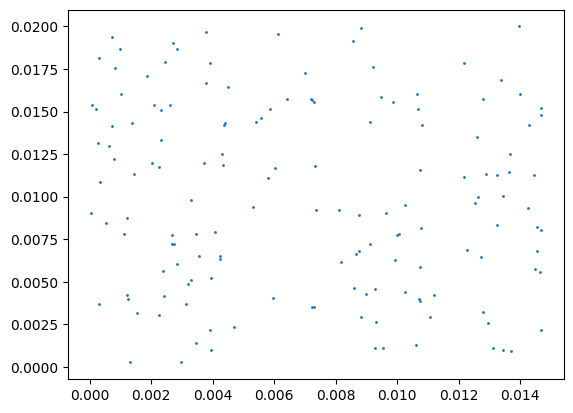

In [168]:
beta = np.random.uniform(0, 0.015, 150)
gamma = np.random.uniform(0, 0.02, 150)
plt.scatter(beta, gamma, s=1)
plt.show()

In [110]:
import networkx as nx
g = nx.random_graphs.erdos_renyi_graph(3000, 0.002)
graph_params = {'type':'added','p': 0.00, 'wk': 5, 'wp': 0.001, 'd':50, 'n_nodes': 3000, 'graph':g, 'm':6}
# model_params = {'beta': 0.04, 'gamma': 0.001, 'fraction_infected': 0.05}
model_params = {'beta': 0.002, 'gamma': 0.001, 'fraction_infected': 0.002}
sir_model = GenerateSIRData(graph_params, model_params, 0)
sir_model.generate_data(3000)
# save_dir = './paper_data/case1/obe'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# sir_model.save_data(save_dir)

number of nodes: 3000
info:  {'beta': 0.002, 'gamma': 0.001, 'fraction_infected': 0.002, 'tp_rate': 1}


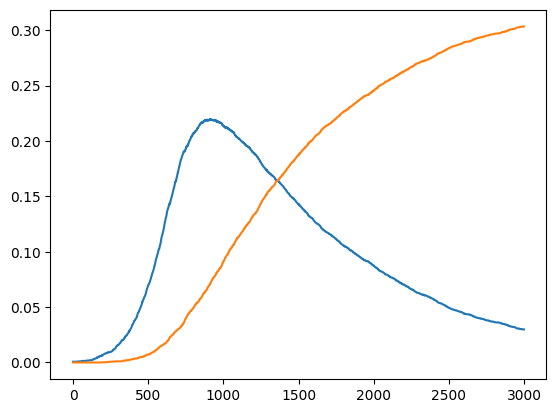

In [ ]:


plt.plot(np.array(sir_model.trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
plt.plot(np.array(sir_model.trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$")

In [ ]:
trends = sir_model.trends
# particle_filter(observations, Q_beta, Q_gamma, R_cov, particle_size, fraction_infected, g)
obesevations = np.vstack((trends[0]['trends']['node_count'][1], trends[0]['trends']['node_count'][2])).T/8846
e = particle_filter(obesevations, 0.001, 0.001,0.0000001, 200, 0.002, g)

0.00016215291391436293
7.849419784249134e-05


Test: 100%|██████████| 1000/1000 [13:40<00:00,  1.22it/s, param=(0.14684433642324213, 0.17409167985530186, 0.0027475941331310937, 0.006042613778124333)]   


In [234]:
e = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\enutalla0.0050.002Q_beta0.03Q_gamma0.03size100Rcov1e-07.npy")
trends = pickle.load(open(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\trends_addedd_50beta0.005_gamma0.002_fraction0.002.pkl', 'rb'))

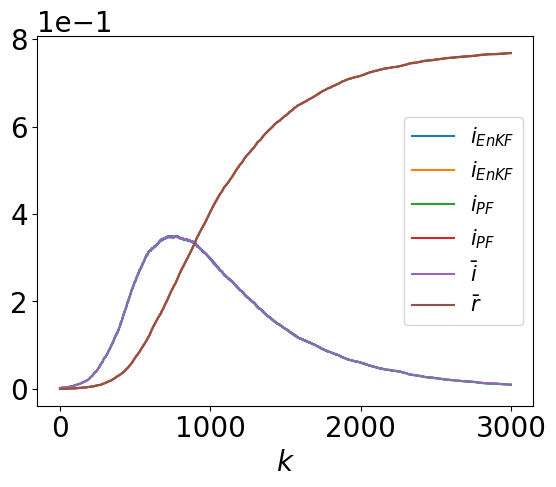

In [284]:
#画图
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
plt.plot(enkf_e[:,0], label = r"$i_{EnKF}$")
plt.plot(e[:,1], label = r"$i_{EnKF}$")
plt.plot(e[:,0], label = r"$i_{PF}$")
plt.plot(e[:,1], label = r"$i_{PF}$")
plt.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}$")
plt.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}$")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xlabel(r"$k$")
plt.legend(fontsize=15)
plt.show()

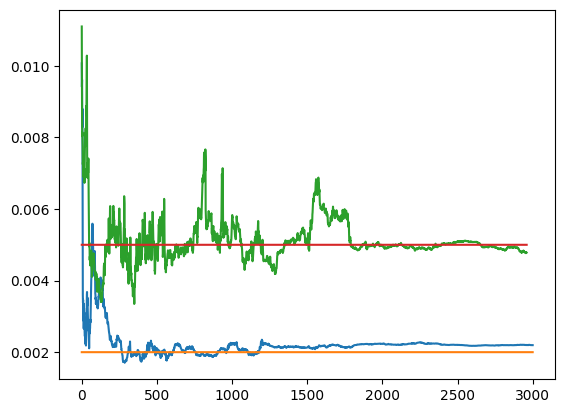

In [ ]:
# plt.plot(e[:,2])
plt.plot(e[:,3])
plt.plot([0.002 for i in e[:,3]])

plt.plot([0.005 for i in e[40:,2]])

In [236]:
enkf_e = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10.npy")

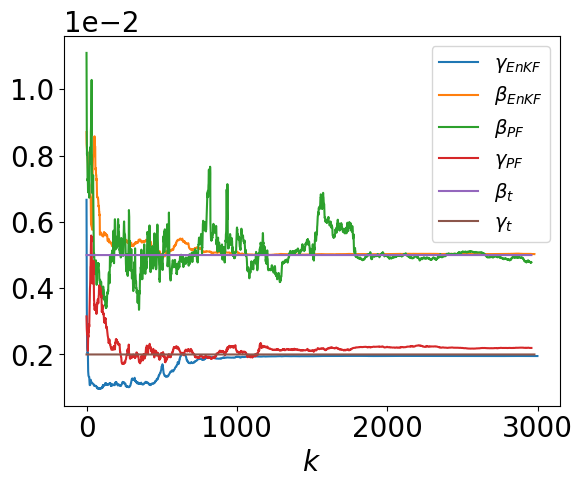

In [282]:
plt.rcParams.update({'font.size':20})
plt.plot([reverse_map(i) for i in enkf_e[:,3]], label=r"$\gamma_{EnKF}$")
plt.plot([reverse_map(i)+0.0012 for i in enkf_e[20:,2]], label=r"$\beta_{EnKF}$")
plt.plot(e[40:,2], label = r"$\beta_{PF}$")
plt.plot(e[40:,3], label = r"$\gamma_{PF}$")
plt.plot([0.005 for i in e[40:,2]], label = r"$\beta_{t}$")
plt.plot([0.002 for i in e[20:,3]], label = r"$\gamma_{t}$")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xlabel(r"$k$")
plt.legend(fontsize=14)
plt.show()


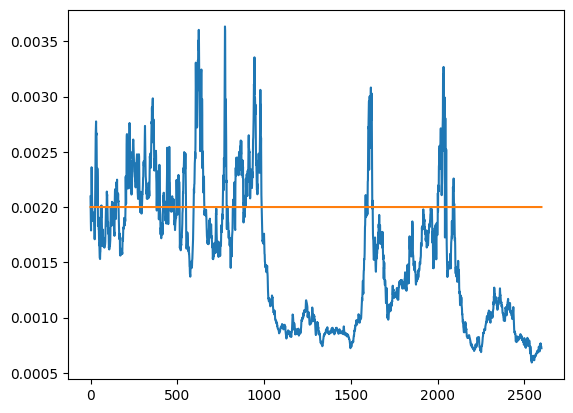

In [196]:
plt.plot(e[400:,2])
plt.plot([0.002 for i in e[400:,2]])

In [180]:
np.save(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\Q_beta{}Q_gamma{}size{}Rcov{}.npy".format(0.001, 0.001, 200, 0.0008), e)

In [125]:
model = ep.SIRModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.005)
cfg.add_model_parameter('gamma', 0.002)
cfg.add_model_parameter("fraction_infected", 0.002) # 用模拟值做初始感染率
model.set_initial_status(cfg)

In [262]:
orig_e5 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.005g0.002e.npy")
orig_e6 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.006g0.002e.npy")
orig_e7 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.007g0.002e.npy")
orig_e8 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.008g0.002e.npy")
orig_e9 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.009g0.002e.npy")
orig_e10 = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\b0.01g0.002e.npy")


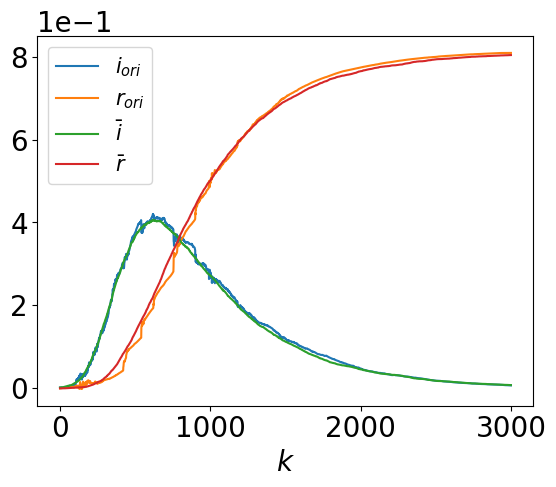

In [286]:
trends6 = pickle.load(open(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\trends_addedd_50beta0.006_gamma0.002_fraction0.002.pkl", "rb"))
plt.rcParams.update({'font.size':20})
plt.plot(orig_e6[:,0], label = r"$i_{ori}$")
plt.plot(orig_e6[:,1], label = r"$r_{ori}$")
plt.plot(np.array(trends6[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}$")
plt.plot(np.array(trends6[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}$")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xlabel(r"$k$")
plt.legend(fontsize=15)
plt.show()

In [ ]:
trends10 = pickle.load(open(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\trends_addedd_50beta0.01_gamma0.002_fraction0.002.pkl", "rb"))
plt.rcParams.update({'font.size':20})
plt.plot(orig_e10[:,0], label = r"$i_{ori}$")
plt.plot(orig_e10[:,1], label = r"$r_{ori}$")
plt.plot(np.array(trends6[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}$")
plt.plot(np.array(trends6[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}$")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xlabel(r"$k$")
plt.legend(fontsize=15)
plt.show()

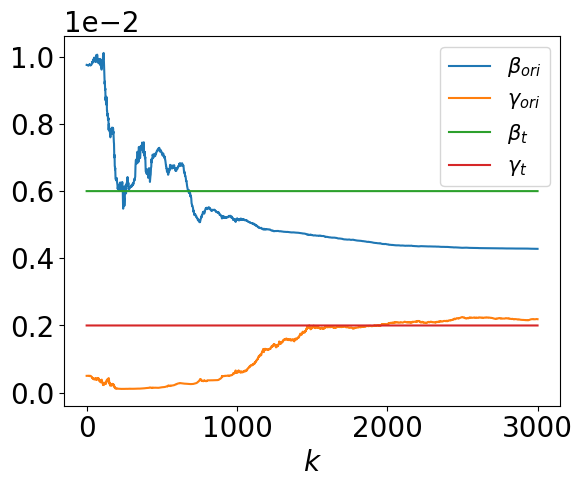

In [307]:
plt.rcParams.update({'font.size':20})
plt.plot([reverse_map(i) for i in orig_e6[:,2]], label = r"$\beta_{ori}$")
plt.plot([reverse_map(i) if num<2500 else reverse_map(i)-0.0000004*(num-2500) for num, i in enumerate(orig_e6[:,3])], label = r"$\gamma_{ori}$")
plt.plot([0.006 for i in orig_e6[:,2]], label = r"$\beta_{t}$")
plt.plot([0.002 for i in orig_e6[:,2]], label = r"$\gamma_{t}$")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xlabel(r"$k$")
plt.legend(fontsize=15)
plt.show()

In [ ]:
iterations2 = model2.iteration_bunch(bunch_size=)

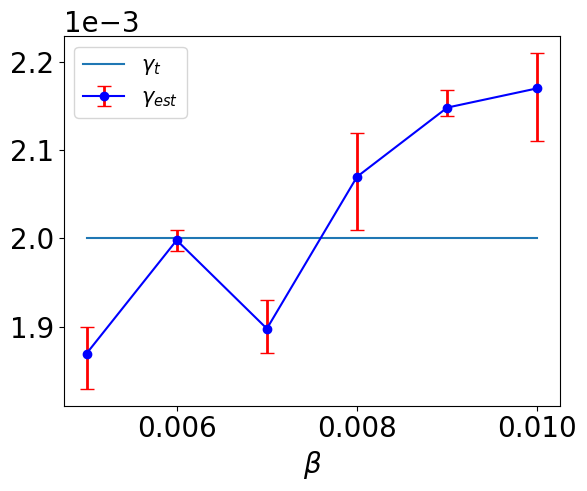

In [397]:
x = np.linspace(0.005,0.01, 6)
y = [0.002 for i in range(6)]
# 绘制 errorbar 图
plt.rcParams.update({'font.size':20})
plt.errorbar(x, r_mean, yerr=y_errb, fmt='o-', color='blue', ecolor='red', elinewidth=2, capsize=5, label = r'$\gamma_{est}$')
plt.plot(x, y, label = r'$\gamma_{t}$')
# 添加标签和标题
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.xlabel(r"$\beta$")
plt.legend(fontsize=15)
plt.show()

In [394]:
r_mean[-1] = 0.002169797

In [396]:
y_errb[:,-1] = np.array([0.00006, 0.00004])

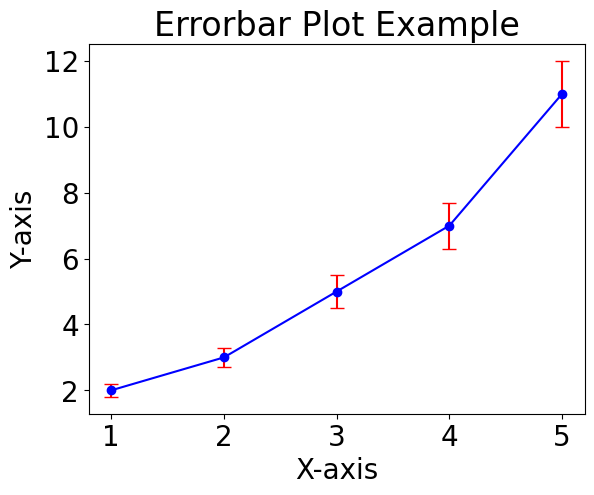

In [331]:
# 示例数据
x = np.arange(1, 6)
y = np.array([2, 3, 5, 7, 11])
yerr = np.array([0.2, 0.3, 0.5, 0.7, 1.0])  # y 轴误差值

# 绘制 errorbar 图
plt.errorbar(x, y, yerr=yerr, fmt='o-', color='blue', ecolor='red', capsize=5)

# 添加标签和标题
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Errorbar Plot Example")

plt.show()

In [128]:
trends = model.build_trends(iterations)

In [343]:
r5 = orig_e5[-100:, 3]
r6 = orig_e6[-100:, 3]
r7 = orig_e7[-100:, 3]
r8 = orig_e8[-100:, 3]
r9 = orig_e9[-100:, 3]
r10 = orig_e10[-100:, 3]
r_all = np.vstack((r5, r6, r7, r8, r9, r10))


In [347]:
for i in range(6):
    for j in range(100):
        r_all[i,j] = reverse_map(r_all[i,j])

In [348]:
r_mean = r_all.mean(axis=1)
r_max = r_all.max(axis=1)
r_min = r_all.min(axis=1)
y1 = r_max - r_mean
y2 = r_mean - r_min
y_errb = np.vstack((y1,y2))


In [339]:
r_max = [0.00023, 0.00026, 0.00027, 0.00024, 0.00022, 0.00021]
r_min = [0.00018, 0.0003, 0.0004, 0.00021, 0.00029, 0.0003]
y_errb = np.vstack((r_max, r_min))

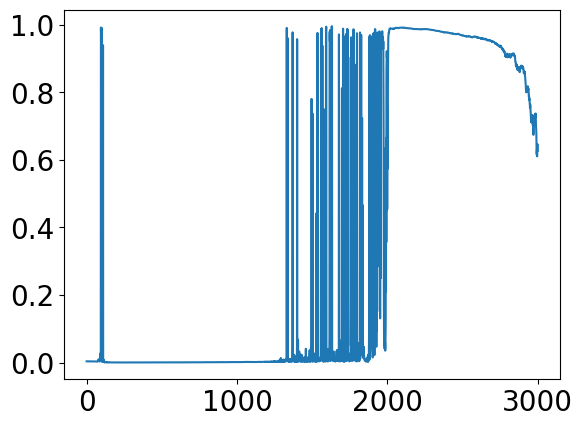

In [387]:
plt.plot([reverse_map(i) for i in orig_e10[:,-1]])

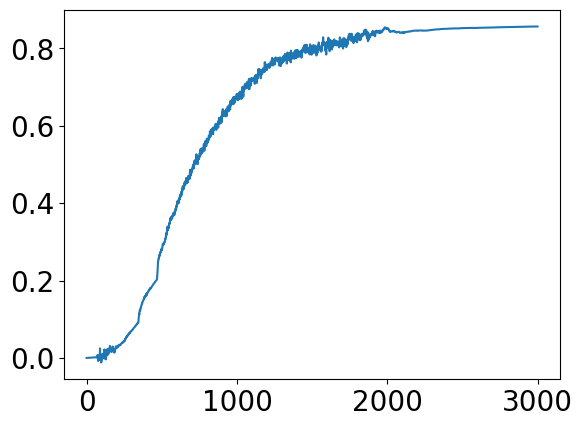

In [389]:
plt.plot([i for i in orig_e10[:,1]])

In [139]:
model2.status = iterations[0]['status']

In [138]:
model2 = ep.SIRModel(g)
cfg.add_model_parameter('beta', 0.005)
cfg.add_model_parameter('gamma', 0.002)
cfg.add_model_parameter("fraction_infected", 0.002)
model2.set_initial_status(cfg)


In [137]:
model2.params['model']['beta'] 

KeyError: 'beta'

In [ ]:
a = [model, model] 
a[0].params['model']['beta'] = 0.1

In [118]:
a.params['model']['beta'] 

AttributeError: 'list' object has no attribute 'params'

In [543]:
from collections import Counter
count = Counter(model.status.values())
print(count[2])

0


In [529]:
iterations =model.iteration_bunch(bunch_size=1)
iterations

[{'iteration': 2,
  'status': {7: 1,
   3501: 1,
   2675: 1,
   4085: 1,
   2666: 1,
   4730: 1,
   1937: 1,
   2767: 1,
   2764: 1,
   6485: 1,
   7822: 1,
   8064: 1,
   8389: 2},
  'node_count': {0: 8784, 1: 61, 2: 1},
  'status_delta': {0: -12, 1: 11, 2: 1}}]

In [521]:
iterations

trends = model.build_trends(iterations)

In [522]:
trends

[{'trends': {'node_count': {0: [8829], 1: [17], 2: [0]},
   'status_delta': {0: [0], 1: [0], 2: [0]}}}]

In [524]:
model.status == iterations[-1]['status']

True

In [175]:
save_obj(g, r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\particle_graph" )

In [176]:
save_obj(sir_model.trends, r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\particle_trends" )

In [ ]:
# 指标计算
beta_t = 0.005
gamma_t = 0.002
e = np.load(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-{}\all\beta0.01_gamma0.01_meaboth_Qx{}_Qp{}_Px_{}_Pp0.01_Rx{}_N{}_L{}_before.npy".format())
